<a href="https://colab.research.google.com/github/KPsimo/Kidus_Football_Games/blob/main/DSRP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import warnings
warnings.filterwarnings('ignore')

!pip install pandas
import pandas as pd

!pip install numpy
import numpy as np

!pip install matplotlib
import matplotlib.pyplot as plt

!pip install scikit-learn
from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

In [76]:
# fixed_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/games.csv')
# fixed_df.isnull()
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GAMES . CSV/games.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
df.columns = df.columns.str.title()
df.columns = df.columns.str.replace('_', ' ')
df['Surface'] = df['Surface'].str.strip()

In [78]:
df['Temp'].median()

59.0

In [79]:
df[df['Wind']>55]
df = df.drop(index =[2396])
df= df.drop(index =[4703])

In [80]:
df[df['Result']<-20]
df.columns


Index(['Game Id', 'Season', 'Game Type', 'Week', 'Gameday', 'Weekday',
       'Gametime', 'Away Team', 'Away Score', 'Home Team', 'Home Score',
       'Location', 'Result', 'Total', 'Overtime', 'Old Game Id', 'Gsis',
       'Nfl Detail Id', 'Pfr', 'Pff', 'Espn', 'Ftn', 'Away Rest', 'Home Rest',
       'Away Moneyline', 'Home Moneyline', 'Spread Line', 'Away Spread Odds',
       'Home Spread Odds', 'Total Line', 'Under Odds', 'Over Odds', 'Div Game',
       'Roof', 'Surface', 'Temp', 'Wind', 'Away Qb Id', 'Home Qb Id',
       'Away Qb Name', 'Home Qb Name', 'Away Coach', 'Home Coach', 'Referee',
       'Stadium Id', 'Stadium'],
      dtype='object')

Removing unnessecary columns

In [81]:
cols_to_drop = ['Away Qb Name', 'Home Qb Name', 'Away Qb Id', 'Home Qb Id', 'Away Coach',
               'Home Coach', 'Pff', 'Ftn', 'Away Rest', 'Home Rest', 'Pff', 'Ftn', 'Nfl Detail Id',
               'Pfr', 'Espn', 'Away Rest', 'Home Rest', 'Old Game Id', 'Gsis', 'Stadium Id', 'Stadium',
               'Under Odds', 'Over Odds', 'Div Game', 'Game Id']
fixed_df = df.drop(columns=cols_to_drop)
fixed_df.columns

Index(['Season', 'Game Type', 'Week', 'Gameday', 'Weekday', 'Gametime',
       'Away Team', 'Away Score', 'Home Team', 'Home Score', 'Location',
       'Result', 'Total', 'Overtime', 'Away Moneyline', 'Home Moneyline',
       'Spread Line', 'Away Spread Odds', 'Home Spread Odds', 'Total Line',
       'Roof', 'Surface', 'Temp', 'Wind', 'Referee'],
      dtype='object')

In [82]:
fixed_df.loc[fixed_df['Roof'] == 'closed', 'Temp'] = fixed_df.loc[fixed_df['Roof'] == 'closed', 'Temp'].fillna(fixed_df['Temp'].median())
fixed_df.loc[fixed_df['Roof'] == 'dome', 'Temp'] = fixed_df.loc[fixed_df['Roof'] == 'dome', 'Temp'].fillna(fixed_df['Temp'].median()) #Regulated temp so I took the median to balalnce

In [83]:
fixed_df.loc[fixed_df['Roof'] == 'closed', 'Wind'] = fixed_df.loc[fixed_df['Roof'] == 'closed', 'Wind'].fillna(0)
fixed_df.loc[fixed_df['Roof'] == 'dome', 'Wind'] = fixed_df.loc[fixed_df['Roof'] == 'dome', 'Wind'].fillna(0) #Indoors has no wind
pd.set_option('display.max_columns', None)  # Show all columns

New Column for Wins

In [84]:
fixed_df['Result']

,Result
0,-3.0
1,3.0
2,-43.0
3,4.0
4,17.0
...,...
7258,NaN
7259,NaN
7260,NaN
7261,NaN


In [85]:
fixed_df['Home Result'] = ''

fixed_df.loc[fixed_df['Result'] > 0, 'Home Result'] = "Win"
fixed_df.loc[fixed_df['Result'] < 0, 'Home Result'] = "Lose"
fixed_df.loc[fixed_df['Result'] == 0, 'Home Result'] = "Draw"

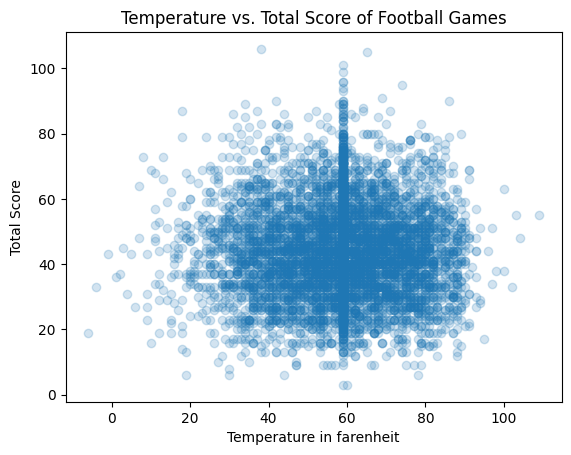

In [108]:
categories = fixed_df['Temp']
bars = fixed_df['Total']

plt.scatter(categories, bars, alpha = 0.2)
plt.title("Temperature vs. Total Score of Football Games")
plt.ylabel("Total Score")
plt.xlabel("Temperature in farenheit")
plt.show()

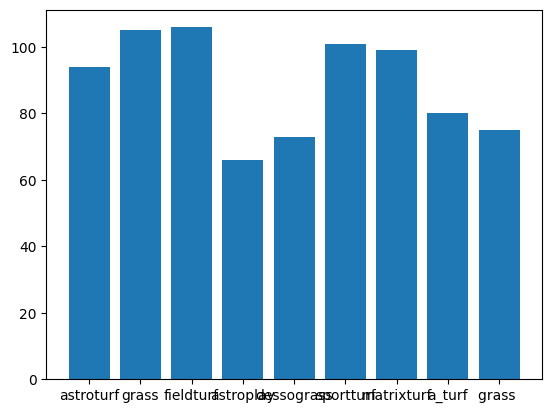

array(['astroturf', 'grass', 'fieldturf', 'astroplay', 'dessograss',
       'sportturf', 'matrixturf', 'a_turf', 'grass ', nan], dtype=object)

In [93]:
plot_df = fixed_df[['Surface', 'Total']].dropna()
plot_df.isnull().value_counts()
plot_df

plt.bar(plot_df['Surface'], plot_df['Total'])
plt.show()

fixed_df['Surface'].unique()

In [95]:
df['Stadium'].unique()

array(['Georgia Dome', 'Soldier Field', 'Cleveland Browns Stadium',
       'Lambeau Field', 'RCA Dome', 'Alltel Stadium',
       'Louisiana Superdome', 'Giants Stadium', 'Veterans Stadium',
       'Seattle Kingdome', 'TWA Dome', 'Raymond James Stadium',
       'Adelphia Coliseum', 'Jack Kent Cooke Stadium',
       'Mile High Stadium', 'PSINet Stadium', 'Ralph Wilson Stadium',
       'Ericsson Stadium', 'Cinergy Field', 'Pontiac Silverdome',
       'Arrowhead Stadium', 'Pro Player Stadium',
       'Hubert H. Humphrey Metrodome', 'Foxboro Stadium', '3Com Park',
       'Texas Stadium', 'Network Associates Coliseum',
       'Three Rivers Stadium', 'Qualcomm Stadium', 'Sun Devil Stadium',
       'FedExField', 'Paul Brown Stadium', 'Husky Stadium',
       'Invesco Field at Mile High', "Dome at America's Center",
       'Heinz Field', 'Memorial Stadium (Champaign)', 'The Coliseum',
       'Reliant Stadium', 'Gillette Stadium', 'Ravens Stadium',
       'Seahawks Stadium', 'Edward Jones Dome', 